In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Dipole charge (C), Permittivity of free space (F.m-1)
q, eps0 = 1.602e-19, 8.854e-12

# Cartesian axis system with origin at the dipole (m)
length = 5e-11
mesh = int(1000)
X = np.linspace(-length, length, mesh)
Y = X.copy()
X, Y = np.meshgrid(X, Y)

I want to create a contor plot of the potential on a 1000x1000 grid. I will first use the naive method.

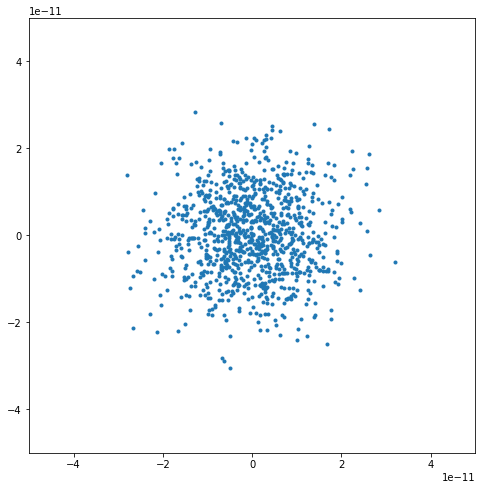

In [5]:
# first create random points.
mu, sigma = 0, 1e-11 # mean and standard deviation
numofpoints = 1000
x = np.random.default_rng().normal(mu, sigma, numofpoints)
y = np.random.default_rng().normal(mu, sigma, numofpoints)
i=0
while i < len(x):
    if (x[i]**2+y[i]**2)>length:
        x[i]=x = np.random.default_rng().normal(mu, sigma, 1)
        y[i]=x = np.random.default_rng().normal(mu, sigma, 1)
        i=i-1
    i=i+1
plt.figure(figsize=[8,8])
plt.xlim(-length, length)
plt.ylim(-length, length)
plt.scatter(x, y, marker=".")

In [35]:
# calculate the potential at each (X,Y) for each point (x,y).
def V(x,y,X,Y):
    s=(1/np.sqrt((X-x)**2+(Y-y)**2))
    return s.sum()*1/(4*np.pi*eps0)*q

In [36]:
print(V(x,y,0,0))
print(V(x,y,length,length))

172075.693804152
20725.623384255694


In [37]:
%%time
# The main calculation of the potential
# O(N^2) in this case (1000^2*1000)=10E9 calculations
Z = np.zeros((mesh,mesh))
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j]=V(x,y,X[i,j],Y[i,j])

CPU times: user 15.2 s, sys: 42.6 ms, total: 15.3 s
Wall time: 15.3 s


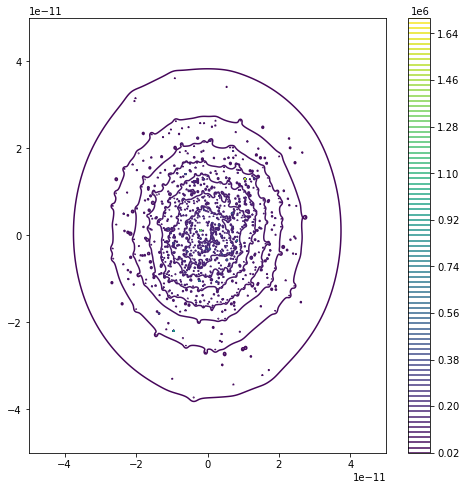

In [41]:
plt.figure(figsize=[8,8])
plt.xlim(-length, length)
plt.ylim(-length, length)
plt.contour(X, Y, Z, 100)
plt.colorbar();

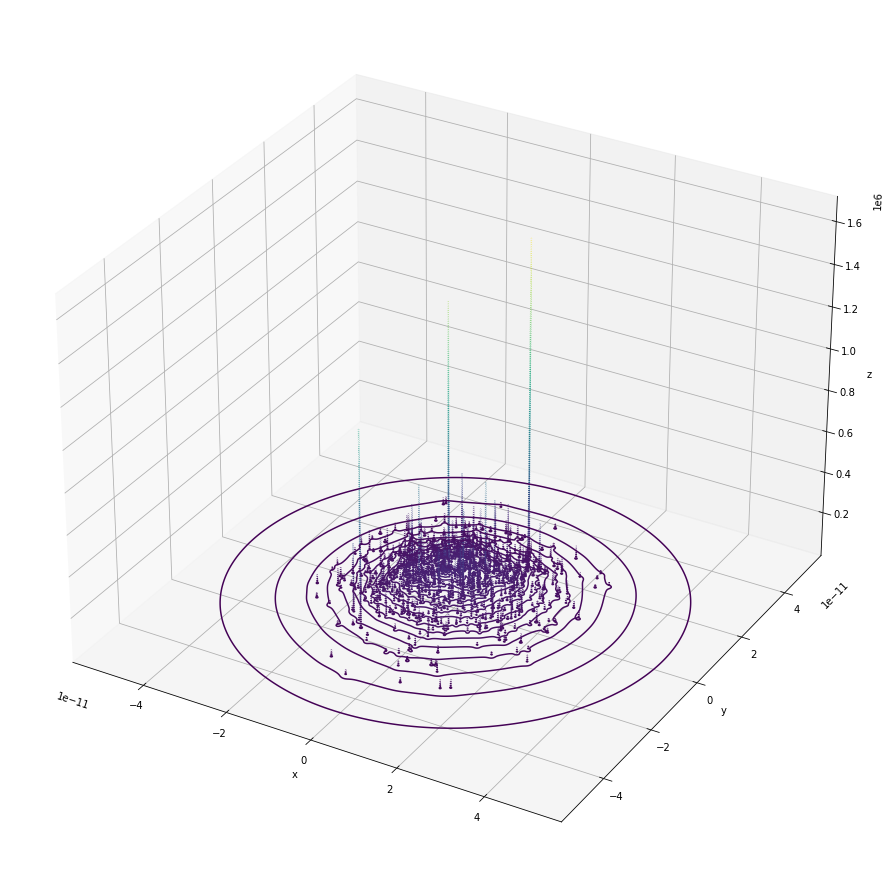

In [42]:
fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Tree Code

First I want to get the tree code working. I will try to get the simple NlogN code to work and test it it matches the direct solution. Given a set of points, boudary, and number of levels, create a quad tree.

In [3]:
# create object for each point
class cPoint:
    def __init__(self, x, y, weight):
        self.x = x
        self.y = y
        self.weight = weight

# data: array object of points in x,y coordinate. -xlim < x < xlim; -ylim < y < ylim
# xlim: limit is from -xlim,xlim
# ylim: limit is from -ylim,ylim
# level: number of levels
# return root of tree

def quadtree(data,xmin,xmax,ymin,ymax,level):
    
    return root

# view the particles in the tree at certain levels
def viewQuadtree(root,level):
    return

In [23]:
# creates points object
points = [None]*len(x)
for i in range(len(x)):
    points[i] = cPoint(x[i],y[i],q)
    
maxlevel = np.ceil(np.log2(len(x)))

1024